# Open data Canarias - Desfibriladores

In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/desfribriladores/desa.csv
./input/desfribriladores/.ipynb_checkpoints/desa-checkpoint.csv
./input/inspecciones/centros-por-zonas-de-inspeccion.csv
./input/inspecciones/inspector.csv
./input/inspecciones/zonas-de-inspeccion.csv
./input/meteorologia-canarias/estaciones.csv
./input/meteorologia-canarias/observaciones_2019.csv
./input/meteorologia-canarias/observaciones_2020.csv
./input/meteorologia-canarias/observaciones_2021.csv


In [2]:
df = pd.read_csv('./input/desfribriladores/desa.csv', index_col='pk')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cod_postal,874.0,3.696627e+04,1616.987357,3.500100e+04,3.520900e+04,3.800500e+04,3.861000e+04,3.891700e+04
x,874.0,4.149945e+05,108263.795463,2.030620e+05,3.415755e+05,3.770360e+05,4.579210e+05,6.526680e+05
y,874.0,3.129443e+06,36764.571475,3.060950e+06,3.105575e+06,3.118305e+06,3.149830e+06,3.234480e+06
vigencia_inicio,874.0,2.017091e+13,0.000000,2.017091e+13,2.017091e+13,2.017091e+13,2.017091e+13,2.017091e+13
vigencia_fin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver que el campo `vigencia_fin` no es relevante puesto que está incompleto. De igual forma, el campo `vigencia_inicio` siempre tiene el mismo valor ya que la media, el máximo y el mínimo son iguales.

Para evitar ruido elimnaremos estas columnas.

In [3]:
del df['vigencia_fin']
del df['vigencia_inicio']
df.head()

,desa,direccion,ubicacion,localidad,cod_postal,isla,x,y
pk,,,,,,,,
1,DESA00004,LUGAR PIEDRA SANTA S/N,CENTRAL TÉRMICA JINÁMAR: Sala de control,Palmas de Gran Canaria (Las),35016,GRAN CANARIA,459853,3101710.0
2,DESA00005,LUGAR SALINAS DEL MATORRAL S/N - JUAN GRANDE,CENTRAL TÉRMICA EL MATORRAL: Sala de control d...,San Bartolome de Tirajana,35107,GRAN CANARIA,456900,3075380.0
3,DESA00009,AVDA FRANCISCO LA ROCHE S/N,REAL CLUB NAUTICO DE TENERIFE: Botiquín del Club,Santa Cruz de Tenerife,38001,TENERIFE,378400,3150860.0
4,DESA00010,PUERTO DE FUERTEVENTURA,PUERTO DE FUERTEVENTURA: Vehículo Jefe Servici...,Puerto del Rosario,35310,FUERTEVENTURA,612007,3153010.0
5,DESA00022,PUERTO DE LANZAROTE,PUERTO DE LANZAROTE: Vehículo Jefe Servicio Po...,Arrecife,35310,LANZAROTE,643619,3205920.0


In [4]:
desfribiladores_por_isla = df.groupby('isla')\
    .localidad.count()\
    .to_frame()\
    .rename(columns={'localidad': 'total'})\
    .sort_values('total', ascending=False)\
    .reset_index()

desfribiladores_por_isla

,isla,total
0,TENERIFE,393
1,GRAN CANARIA,272
2,LANZAROTE,80
3,FUERTEVENTURA,56
4,LA PALMA,48
5,LA GOMERA,20
6,EL HIERRO,5


<AxesSubplot:title={'center':'Desfribiladores por isla'}, xlabel='isla', ylabel='total'>

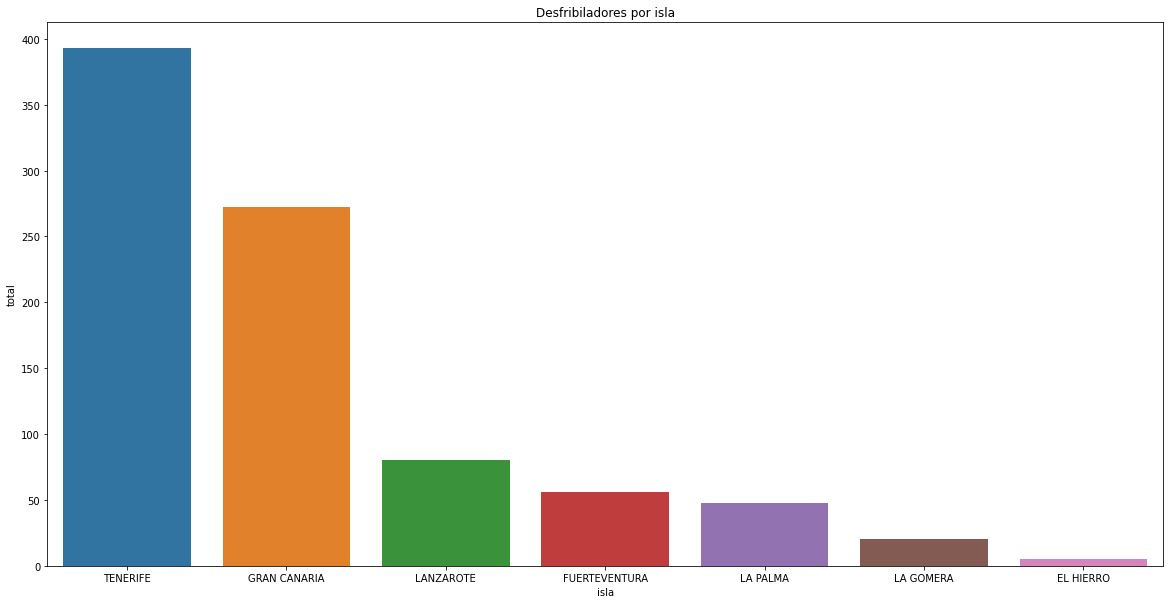

In [5]:
plt.figure(figsize=(20,10))
plt.title("Desfribiladores por isla")

sns.barplot(data=desfribiladores_por_isla, x='isla', y='total')

## Desfribiladores por localidad e isla

In [12]:
desfribiladores_por_isla_y_localidad = df.groupby(['isla', 'localidad'])\
    .cod_postal.count()\
    .to_frame()\
    .rename(columns={'cod_postal': 'total'})\
    .sort_values('total', ascending=False)\
    .reset_index()

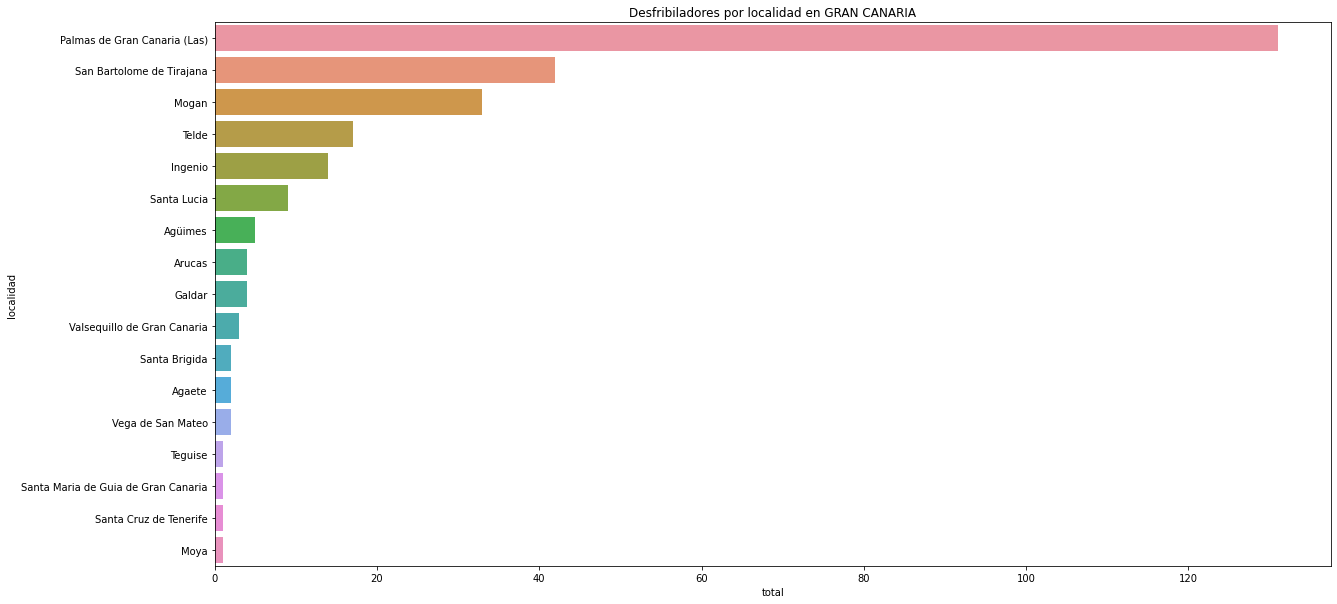

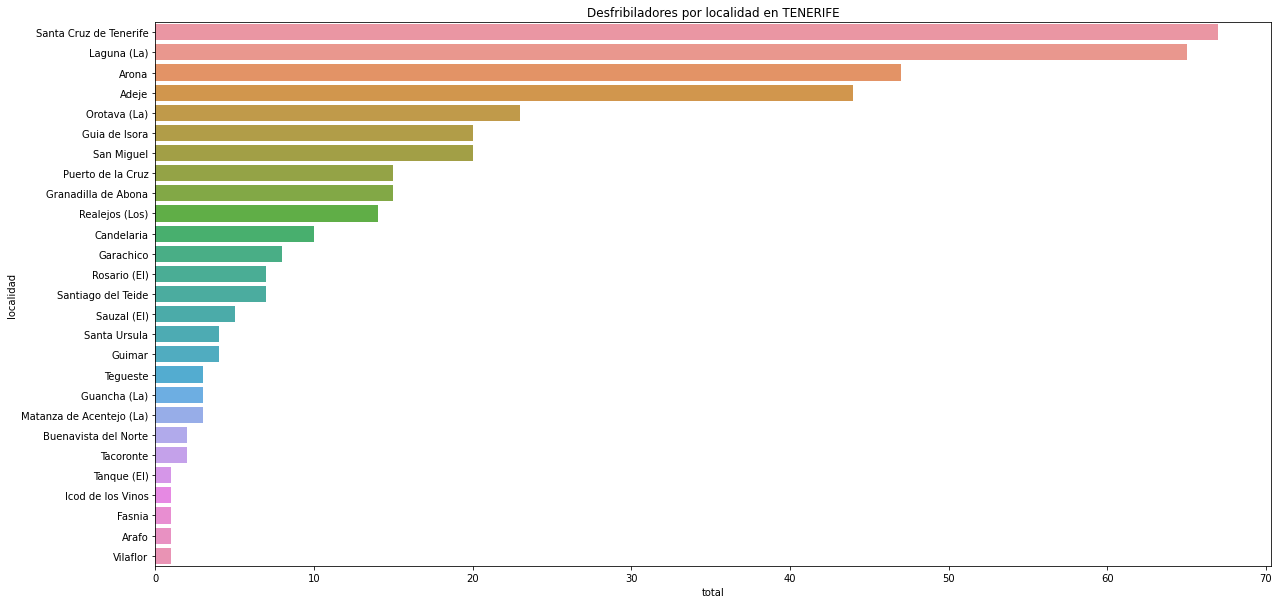

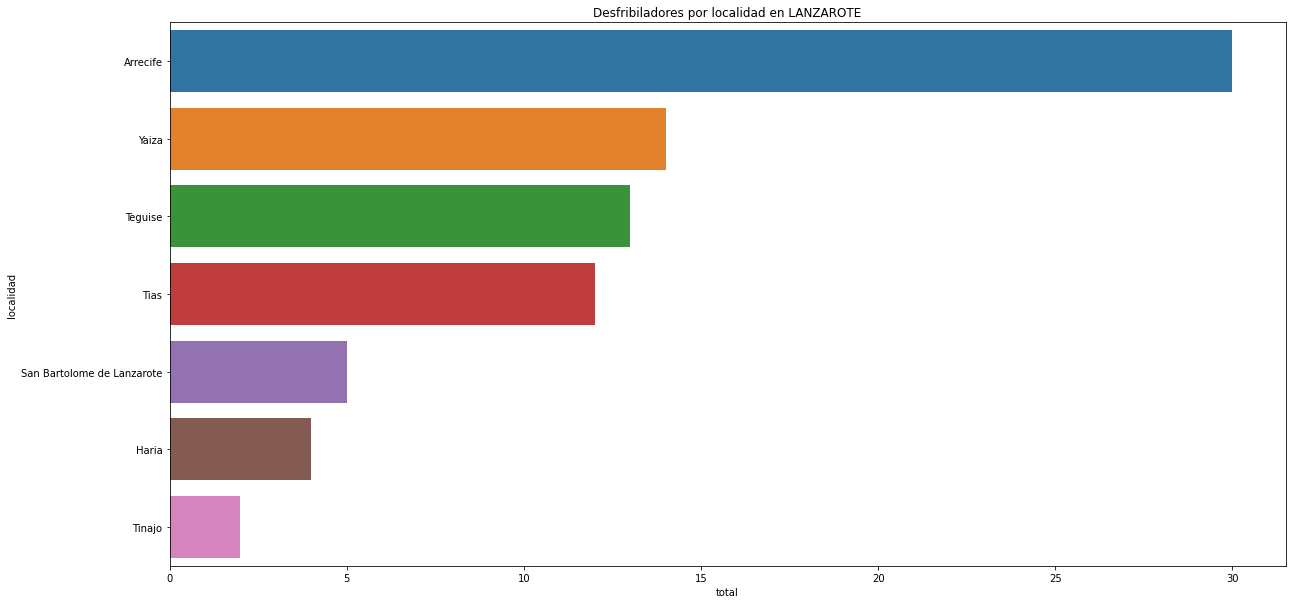

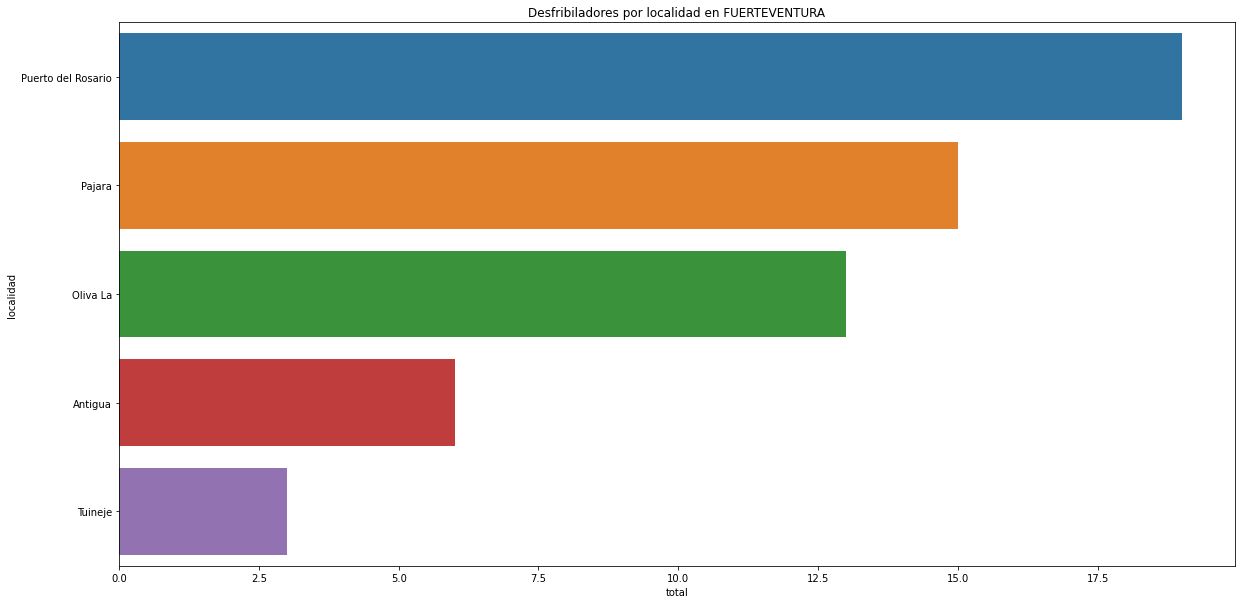

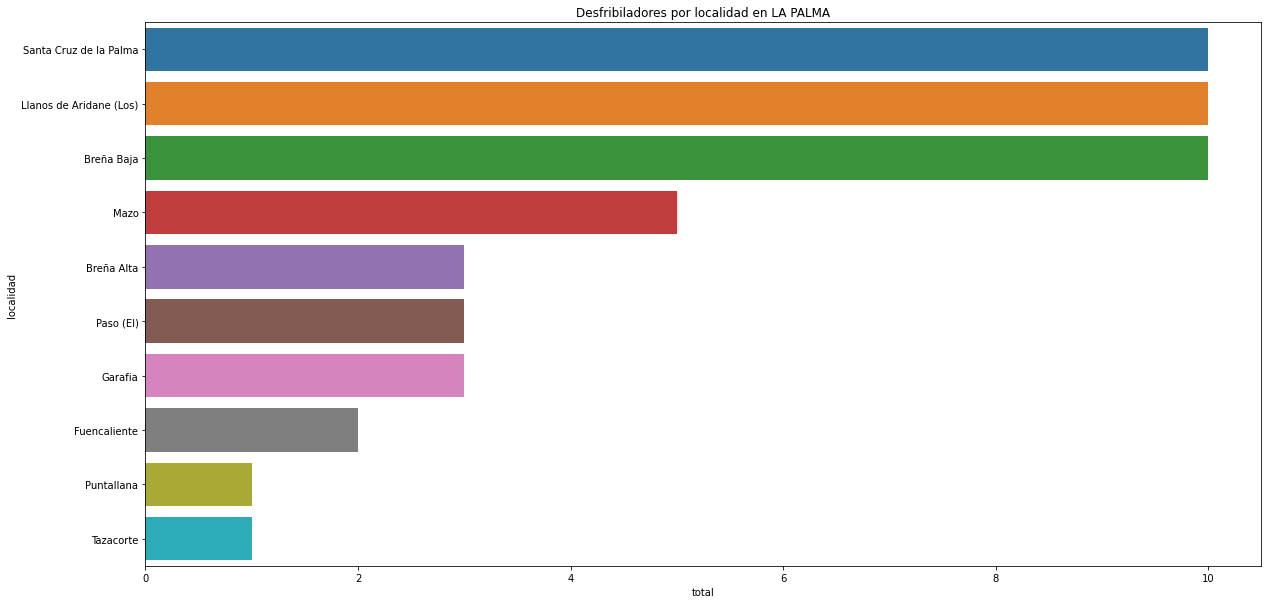

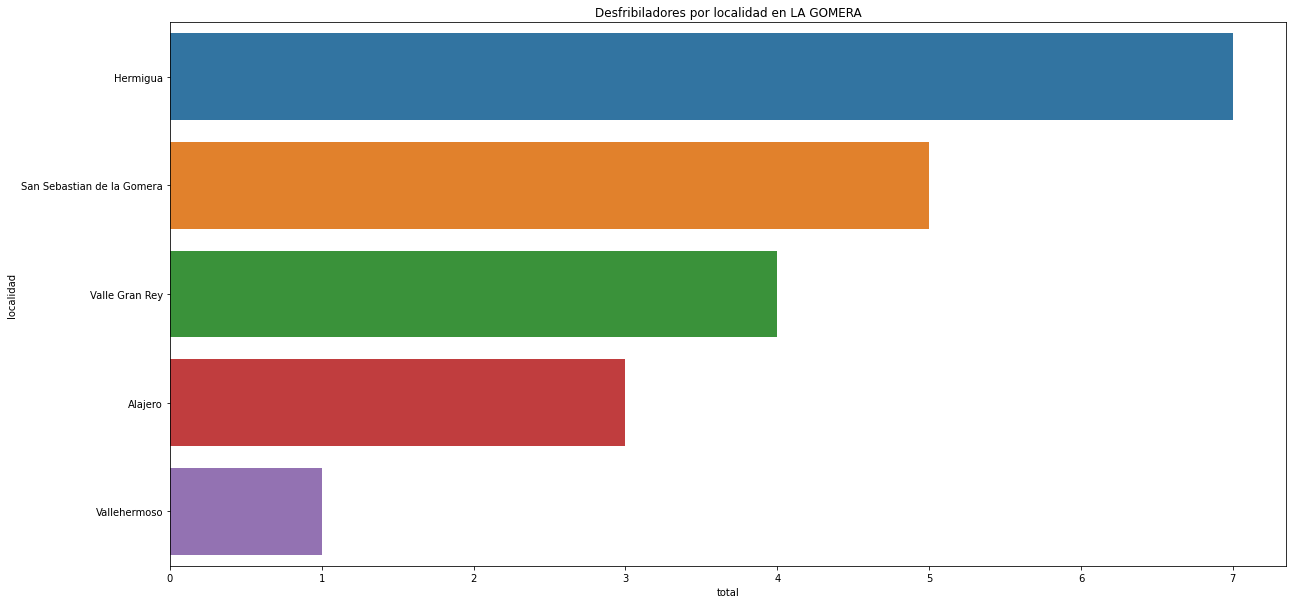

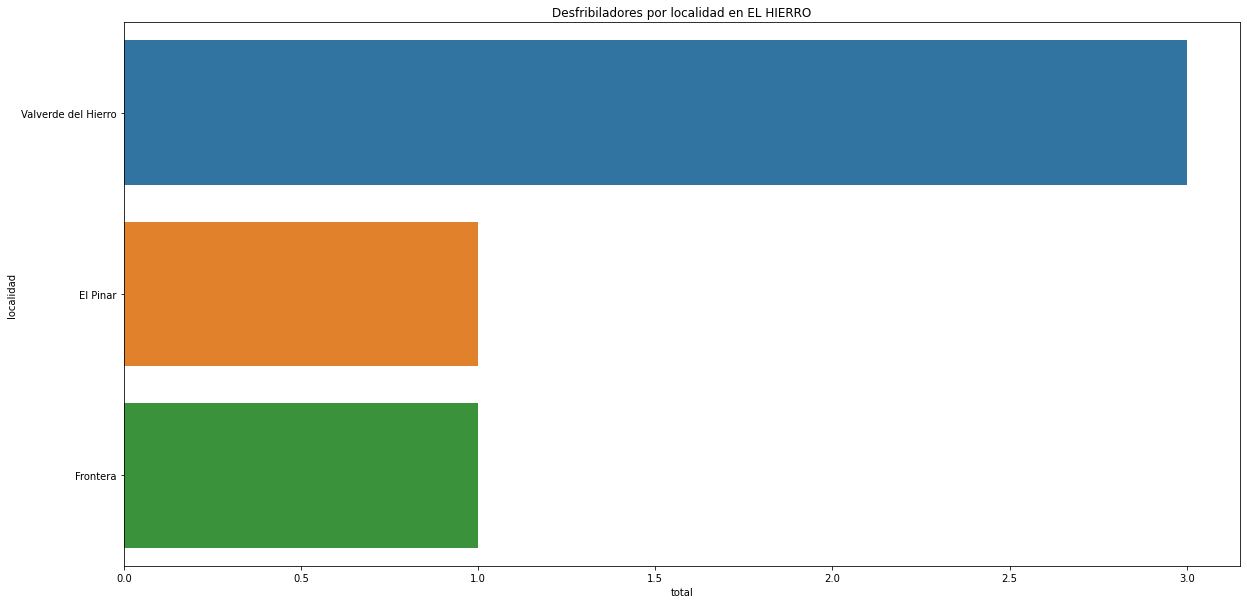

In [7]:
for isla in desfribiladores_por_isla_y_localidad.isla.unique():
    plt.figure(figsize=(20,10))
    plt.title("Desfribiladores por localidad en "+isla)
    sns.barplot(data=desfribiladores_por_isla_y_localidad[desfribiladores_por_isla_y_localidad['isla'] == isla], x='total', y='localidad')